# TLPA 絵画命名検査での発話単語逆モデル CCAP バージョン

- date: 2022-0206
- filename: 2022_0212tlpa_p2o.ipynb
- file required: 呼称(TLPA)語彙属性.xlsx
- author: 浅川伸一
- license: MIT

## 手続き


### 材料

TLPA の絵画命名課題に用いられる図版 200 枚を単語にして刺激語として用いた。
TLPA の本課題は，入力が白黒画像であるが，これを単語として表現した場合，複数の表記が考えられる。
たとえば，「海苔巻き」と「ノリ巻き」とであれば，どちらでも刺激図版を表す単語として用いることができる。
今回は，日本語ウィキペディア 2021 年 5 月版に記載のあった単語を用いることとした。
このため，200 枚の図版に対して，237 語の刺激語を用いた。
一方，NTT 日本語語彙特性 (天野，近藤, 1999) の頻度に基づいて，最頻語を 10,000 語用いて訓練データとした。
NTT 日本語語彙特性に基づく単語頻度のうち，記号やアルファベットを除き，かつ，上述の TLPA 単語 237 語を除外した
上位 10,000 語を訓練データとした。

訓練においては，各入力単語は，文字別に付番した番号を文字トークン ID とした。
この文字トークン ID を ワンホットベクトルとみなし，入力層に与えた。
出力の音素表現については，単語の読みを mecab (Kudo, 2007) によって取得した。
得られた単語の読みを julius 表記によってアルファベット文字列に変換した情報をワンホットベクトルとみなして出力表現とした。
このようにして得られた，単語の音表現は 41 種 と特殊トークン 4 種の計 45 種 であった。
特殊トークン 4 種とは，入力表現でも用いられた，次の 4 種である。

* '\<EOW\>': 単語の終端を表す特殊トークン
* '\<SOW\>': 単語の先端を表す特殊トークン
* '\<UNK\>': 未知記号を表す特殊トークン
* '\<PAD\>': 埋め草用特殊トークン，ミニバッチ学習の際に入出力表現ベクトルの次元を揃えるために用いられる
    
このようにして得られた入力用文字トークンは，1903 種，音トークンは先述のとおり 45 種とした。
入力文字トークン系列の最大系列長は 12, 出力音トークン系列の最大系列長は，28 であった。

たとえば，単語「バス」についての入出力表現は，以下の通りである:

```
{0: {'orig': 'バス', 'ortho': ['バ', 'ス'], 'phone': ['b', 'a', 's', 'u'], 'ortho_ids': [696, 519], 'phone_ids': [25, 7, 19, 12]
```

### 訓練手続き

材料の項で述べた単語の書記素表現系列から音表現系列への変換を，符号化器=復号化器モデル，あるいは seq2seq モデル，(Sutskever et.al, 2014, arxiv:1409.3215) 
を用いて学習させた。
中間層のニューロン数は 64 または 256 とした。
符号化器=復号化器モデルに用いた理関連とニューラルネットワークとして GRU (Cho, et.al, 2014) を用いた。
学習の評価には，負の対数尤度を用いた。
学習は Adam (Kingma and Welling, 2015, arxiv:1412.6980) を用いて訓練した。
このとき学習係数は 0.01，alpha, beta の値は PyTorch の既定値を用いた。
各学習エポックでは，10,000 語のデータが用いれ，TLPA 語は学習には用いず，検証データして用いた。




### 補足
- 用いた TLPA 単語 (237 語)
```
'バス', '緑', '桜', 'のり巻き', '海苔巻', '五重塔', 'コップ', 'ごぼう', '土踏まず', '風呂', 'ヒトデ', 'ハム', 'うさぎ', '兎', 'ウサギ', 'ロープウェイ', '学校', 'ちりとり', '縁側', '歯', 'ねぎ', 'あじさい', '紫陽花', '灰色', '天井', '鍵', '肌色', 'ワニ', '鰐', '電車', '顔', '松', 'ガードレール', '柿', 'ちまき', '信号', 'ススキ', '薄', 'じょうろ', 'ジョウロ', 'コンセント', '天ぷら', 'てんぷら', '中指', 'ヨット', 'ピンク', 'フクロウ', 'ふくろう', 'みかん', '蜜柑', 'ミカン', '柱', '角砂糖', '犬', 'かご', '駕籠', 'バラ', '薔薇', '鍋', 'まぶた', 'くるみ', '黒', 'デパート', 'カーネーション', '城', 'アリ', '豆腐', 'ドライバー', '紺', '階段', '戦車', '人参', '背中', '鏡餅', 'スプーン', '朝顔', '金色', '足', 'ふすま', 'へび', '蛇', 'ヘビ', 'レモン', '公園', '乳母車', '床', '藤', 'ピンセット', 'トラック', 'いちご', '苺', 'イチゴ', '黄土色', '銭湯', 'ナマズ', 'ソバ', '蕎麦', 'おなか', 'お腹', 'オレンジ', 'バター', '工場', 'ハト', '鳩', '電卓', 'のど仏', '喉仏', 'チューリップ', '白菜', 'トラクター', '廊下', 'パトカー', '押し入れ', '鉛筆', '目尻', '芋', '吊橋', '赤', 'かき氷', '豹', 'サボテン', 'ピラミッド', 'サイ', '目', 'ひまわり', 'はたき', 'さしみ', '刺身', '玄関', 'トマト', '黄緑', '三輪車', 'にわとり', '鶏', 'つむじ', 'アスパラガス', 'ドア', '銀色', 'ウイスキー', '梅', 'タクシー', '動物園', '床の間', 'こげ茶', 'ぶどう', '葡萄', 'ブドウ', '飴', '毛虫', 'アイロン', '寺', 'そり', 'ひょうたん', '首', '消しゴム', '頬', 'イチョウ', 'いちょう', '駅', '餃子', '牛', 'びわ', '枇杷', '飛行機', '畳', '白', '竹', 'ペリカン', '紫', '手すり', '口', '大根', '風車', '鋏', 'ハサミ', '潜水艦', 'ステーキ', 'マッチ', '二階', '落花生', 'ごはん', 'ご飯', '自転車', '歩道橋', 'クジラ', '鯨', '茶色', 'あやめ', 'ふくらはぎ', 'もも', '桃', '鯛焼き', '道路', '靴べら', '水色', '壁', 'タンポポ', 'たんぽぽ', 'いかだ', 'ヤギ', '山羊', '鼻', 'エビ', '海老', '台所', 'オートバイ', 'かぶ', '蕪', '柳', 'しゃもじ', 'まんじゅう', '饅頭', 'かかと', '薄紫', '家', 'おせち料理', '青', '傘', 'つくし', 'リンゴ', '林檎', '馬車', '線路', 'タツノオトシゴ', '耳', '便所', 'レンコン', '蓮根', '猫', '黄色', 'へそ', '街灯', '障子', '酒', '船', '安全ピン', 'もみじ'
```

- 用いた音表現
```
'<EOW>', '<SOW>', '<UNK>', '<PAD>', 'n', 'o', 'h', 'a', 'i', 't', 'g', 'r', 'u', 'd', 'e', 'sh', 'q', 'm', 'k', 's', 'y', 'ch', 'p', 'N', '', 'b', 'ts', 'o:', 'ky', 'f', 'w', 'ry', 'gy', 'u:', 'z', 'j', 'py', 'hy', 'i:', 'e:', 'a:', 'by', 'ny', 'my', 'dy'
```

# 0. ハイパーパラメータの定義

In [3]:
print(f'Current directory is {os.getcwd()}')

import torch.nn
import torch.optim

params = {
    #ハイパーパラメータの定義
    'traindata_size': 10000,
    'epochs' :20,
    'hidden_size': 256,
    'loss_func' : torch.nn.CrossEntropyLoss(), # 交差エントロピー損失
    #'loss_func': torch.nn.NLLLoss(),          # 負の対数尤度損失   

    #'optim_func': torch.optim.SGD,
    #'optim_func': torch.optim.AdamW,
    'optim_func': torch.optim.Adam, 

    'lr': 0.001,                               #学習率
    'dropout_p':0.1,
    'path_saved':'2022_0212tlpa_p2o.pt',
}

params # 確認のため印字

Current directory is /Users/asakawa/study/2022ccap/notebooks


{'traindata_size': 10000,
 'epochs': 20,
 'hidden_size': 256,
 'loss_func': CrossEntropyLoss(),
 'optim_func': torch.optim.adam.Adam,
 'lr': 0.001,
 'dropout_p': 0.1}

## 0.1 準備作業  必要となるライブラリの輸入

In [4]:
import os
import sys
import typing
import numpy as np
import random
import pandas as pd
import gzip
from termcolor import colored

# from tqdm import tqdm         #commandline で実行時
from tqdm.notebook import tqdm  #jupyter で実行時

isColab = 'google.colab' in str(get_ipython())
if isColab:
    !pip install Levenshtein > /dev/null 2>&1
    !pip install japanize_matplotlib > /dev/null 2>&1
    !pip install jaconv > /dev/null 2>&1

import Levenshtein    
import jaconv    

# 1 データセットの読み込み

In [ ]:
%load_ext autoreload
%autoreload 2

# 自作ライブラリの読み込み
if isColab:
    ![ -d ccap ] & /bin/rm -rf ccap
    !git clone https://github.com/ShinAsakawa/ccap.git

from ccap import ccap_w2v
w2v = ccap_w2v(is2017=False, isColab=isColab).w2v

import MeCab
# yomi = MeCab.Tagger('-Oyomi -d /opt/homebrew/lib/mecab/dic/mecab-ipadic-neologd').parse
# yomi_ipa = MeCab.Tagger('-Oyomi -d /opt/homebrew/lib/mecab/dic/ipadic').parse
#from ccap.mecab_settings import wakati
from ccap.mecab_settings import yomi

from ccap.tlpa_o2p import TLPA
tlpa = TLPA(traindata_size=params['traindata_size'])
print(colored(f'訓練データサイズ:{len(tlpa.training_data)} 語。NTT 日本語語彙特性の頻度上位 {len(tlpa.training_data)} 語','blue',attrs=['bold']))
print('ただし，TLPA に用いられる単語は含まない')
print(colored(f'検証データサイズ:{len(tlpa.tlpa_data)} TLPA 単語数','blue',attrs=['bold']))
print(colored(f'音素数:{len(tlpa.phone_vocab)}','blue',attrs=['bold']))
print(colored(f'書記素数:{len(tlpa.ortho_vocab)}','blue',attrs=['bold']))
print(colored(f'最長書記素(文字)数:{tlpa.max_ortho_length}, 最長音素数:{tlpa.max_phone_length}', 'blue',attrs=['bold']))

In [6]:
# 再現性確保のため乱数の種を固定する
import random
import torch

# リソースの選択（CPU/GPU）
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 乱数シード固定（再現性の担保）
def fix_seed(seed):
    random.seed(seed)  # for random
    np.random.seed(seed) # for numpy

    # for pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed = 42
fix_seed(seed)

# データローダーのサブプロセスの乱数の seed が固定
def worker_init_fn(worker_id):
    np.random.seed(np.random.get_state()[1][0] + worker_id)

print(worker_init_fn(1))

None


In [7]:
import torch
import torch.utils.data

class _train_dataset(torch.utils.data.Dataset):
    '''
    上で読み込んだ自作データ管理ライブラリ TLPA でも良いので冗長なのだが，訓練データセットと検証データセットとを明示的に定義しておく
    '''
    
    def __init__(self, tlpa=tlpa)->None:
        self.tlpa = tlpa
        self.data = tlpa.training_data
        self.order = {i:self.data[x] for i, x in enumerate(self.data)}
        
    def __len__(self)->int:
        return len(self.data)
    
    def __getitem__(self, x:int):
        return self.order[x]['phone_ids'] + [self.tlpa.ortho_vocab.index('<EOW>')], self.order[x]['ortho_ids'] + [self.tlpa.phone_vocab.index('<EOW>')]
    
    def convert_ortho_ids_to_tokens(self, ids:list):
        return [self.tlpa.ortho_vocab[idx] for idx in ids]
    
    def convert_phone_ids_to_tokens(self, ids:list):
        return [self.tlpa.phone_vocab[idx] for idx in ids]


class _val_dataset(torch.utils.data.Dataset):
    def __init__(self, tlpa=tlpa)->None:
        self.tlpa = tlpa
        self.data = tlpa.tlpa_data
        self.order = {i:self.data[x] for i, x in enumerate(self.data)}
        
    def __len__(self)->int:
        return len(self.data)
    
    def __getitem__(self, x:int):
        return self.order[x]['phone_ids'] + [self.tlpa.ortho_vocab.index('<EOW>')], self.order[x]['ortho_ids'] + [self.tlpa.phone_vocab.index('<EOW>')]
        #return self.order[x]['ortho_ids'], self.order[x]['phone_ids']
    
    def convert_ortho_ids_to_tokens(self, ids:list):
        return [self.tlpa.ortho_vocab[idx] for idx in ids]
    
    def convert_phone_ids_to_tokens(self, ids:list):
        return [self.tlpa.phone_vocab[idx] for idx in ids]
    
train_dataset = _train_dataset()
val_dataset = _val_dataset()

# # 上で定義したデータセットの出力検証。 ランダムサンプリングを N 回繰り返す
# N = 5
# X = np.random.randint(val_dataset.__len__(),size=N)
# for x in X:
#     orth, phon = val_dataset.__getitem__(x)
#     print(f'検証データセット 入力単語 ID:{orth}, トークン:{val_dataset.convert_ortho_ids_to_tokens(orth)}')
#     print(f'検証データセット 出力単語 ID:{phon}, トークン:{val_dataset.convert_phone_ids_to_tokens(phon)}')

#     orth, phon = train_dataset.__getitem__(x)
#     print(f'訓練データセット 入力単語 ID:{orth}, トークン:{train_dataset.convert_ortho_ids_to_tokens(orth)}')
#     print(f'訓練データセット 出力単語 ID:{phon}, トークン:{train_dataset.convert_phone_ids_to_tokens(phon)}\n---')
    

#print(val_dataset.tlpa.max_ortho_length)
#print(val_dataset.tlpa.max_phone_length)

#print(train_dataset.tlpa.max_ortho_length)
#print(train_dataset.tlpa.max_phone_length)

# 2 学習に用いる，符号化器 (エンコーダ)，復号化器 (デコーダ) の定義

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class EncoderRNN(nn.Module):
    '''RNNによる符号化器'''
    def __init__(self, n_inp, n_hid):
        super().__init__()
        self.n_hid = n_hid

        self.embedding = nn.Embedding(n_inp, n_hid)
        self.gru = nn.GRU(n_hid, n_hid)

    def forward(self, inp, hid):
        embedded = self.embedding(inp).view(1, 1, -1)
        out = embedded
        out, hid = self.gru(out, hid)
        return out, hid

    def initHidden(self):
        return torch.zeros(1, 1, self.n_hid, device=device)


class AttnDecoderRNN(nn.Module):
    '''注意付き復号化器の定義'''
    def __init__(self, n_hid, n_out, dropout_p=0.1, max_length=tlpa.max_phone_length+1):
        super().__init__()
        self.n_hid = n_hid
        self.n_out = n_out
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.n_out, self.n_hid)
        self.attn = nn.Linear(self.n_hid * 2, self.max_length)
        self.attn_combine = nn.Linear(self.n_hid * 2, self.n_hid)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.n_hid, self.n_hid)
        self.out = nn.Linear(self.n_hid, self.n_out)

    def forward(self, inp, hid, encoder_outputs):
        embedded = self.embedding(inp).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hid[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))

        out = torch.cat((embedded[0], attn_applied[0]), 1)
        out = self.attn_combine(out).unsqueeze(0)

        out = F.relu(out)
        out, hid = self.gru(out, hid)

        out = F.log_softmax(self.out(out[0]), dim=1)
        return out, hid, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.n_hid, device=device)

# 3. 訓練関数 `train()` の定義 教師強制付き

In [9]:
def convert_ids2tensor(sentence_ids):
    return torch.tensor(sentence_ids, dtype=torch.long, device=device).view(-1, 1)

teacher_forcing_ratio = 0.5  # 教師強制率。文献によっては，訓練中にこの値を徐々に減衰させることも行われます

def train(input_tensor, 
          target_tensor, 
          encoder, decoder, 
          encoder_optimizer, decoder_optimizer, 
          criterion, max_length=tlpa.max_phone_length+1):
    
    encoder_hidden = encoder.initHidden() # 符号化器の中間層を初期化
    encoder_optimizer.zero_grad()         # 符号化器の最適化関数の初期化
    decoder_optimizer.zero_grad()         # 復号化器の最適化関数の初期化

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)
    encoder_outputs = torch.zeros(max_length, encoder.n_hid, device=device)
    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(
            input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[train_dataset.tlpa.ortho_vocab.index('<SOW>')]], device=device)
    decoder_hidden = encoder_hidden
    
    # 教師強制をするか否かを確率的に決める
    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
    if use_teacher_forcing: # 教師強制する場合 Teacher forcing: Feed the target as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

    else: # 教師強制しない場合 Without teacher forcing: use its own predictions as the next input
        for di in range(target_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()  # detach from history as input

            loss += criterion(decoder_output, target_tensor[di])
            if decoder_input.item() == train_dataset.tlpa.ortho_vocab.index('<EOW>'):
                break

    loss.backward()
    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

In [10]:
import time
import math

def asMinutes(s):
    """時間変数を見やすいように，分と秒に変換して返す"""
    m = math.floor(s / 60)
    s -= m * 60
    return f'{int(m):2d}分 {int(s):2d}秒'
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    """開始時刻 since と，現在の処理が全処理中に示す割合 percent を与えて，経過時間と残り時間を計算して表示する"""
    now = time.time()  #現在時刻を取得
    s = now - since    # 開始時刻から現在までの経過時間を計算
    #s = since - now    
    es = s / (percent) # 経過時間を現在までの処理割合で割って終了予想時間を計算
    rs = es - s        # 終了予想時刻から経過した時間を引いて残り時間を計算

    return f'経過時間:{asMinutes(s)} (残り時間 {asMinutes(rs)})'

# 4. `fit()` 関数の定義 エポックを反復して `train()` を呼び出す

In [11]:
def fit(encoder:nn.Module, 
        decoder:nn.Module, 
        epochs:int=params['epochs'],
        lr:float=params['lr'],
        n_sample:int=3)->list:
    
    start_time = time.time()
    
    encoder.train()
    decoder.train()

    encoder_optimizer = params['optim_func'](encoder.parameters(), lr=lr)
    decoder_optimizer = params['optim_func'](decoder.parameters(), lr=lr)
    criterion = params['loss_func']
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        
        #エポックごとに学習順をシャッフルする
        learning_order = np.random.permutation(train_dataset.__len__())
        for i in range(train_dataset.__len__()):
            x = learning_order[i]   # ランダムにデータを取り出す 
            inputs, targets = train_dataset.__getitem__(x)
            input_tensor = convert_ids2tensor(inputs)
            target_tensor = convert_ids2tensor(targets)
            
            #訓練の実施
            loss = train(input_tensor, target_tensor, 
                         encoder, decoder, 
                         encoder_optimizer, decoder_optimizer, 
                         criterion)
            epoch_loss += loss
        
        losses.append(epoch_loss/train_dataset.__len__())
        print(colored(f'エポック:{epoch:2d} 損失:{epoch_loss/train_dataset.__len__():.2f}', 'cyan', attrs=['bold']),
              f'{timeSince(start_time, (epoch+1) * train_dataset.__len__()/(epochs * train_dataset.__len__()))}')
        
        evaluateRandomly(encoder, decoder, n=n_sample)
        
    return losses

# 5 評価関数 `evaluate()` の定義

In [12]:
def evaluate(encoder:nn.Module, 
             decoder:nn.Module, 
             input_ids:list, 
             max_length:int=tlpa.max_phone_length+1)->(list,torch.LongTensor):
    with torch.no_grad():
        input_tensor = convert_ids2tensor(input_ids)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.n_hid, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[val_dataset.tlpa.phone_vocab.index('<SOW>')]], device=device)
        decoder_hidden = encoder_hidden

        decoded_words, decoded_ids = [], []  # decoded_ids を追加
        decoder_attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            decoder_attentions[di] = decoder_attention.data
            topv, topi = decoder_output.data.topk(1)
            decoded_ids.append(int(topi.squeeze().detach())) # decoded_ids に追加
            if topi.item() == val_dataset.tlpa.ortho_vocab.index('<EOW>'):
                decoded_words.append('<EOW>')
                break
            else:
                decoded_words.append(val_dataset.tlpa.ortho_vocab[topi.item()])

            decoder_input = topi.squeeze().detach()

        return decoded_words, decoded_ids, decoder_attentions[:di + 1]  # decoded_ids を返すように変更
        #return decoded_words, decoder_attentions[:di + 1]    

In [13]:
def evaluateRandomly(encoder:nn.Module, 
                     decoder:nn.Module, 
                     n:int=5)->float:
    
    srcs, preds = [], []
    for x in np.random.randint(val_dataset.__len__(), size=n):
        input_ids, target_ids = val_dataset.__getitem__(x)
        input_words = val_dataset.convert_phone_ids_to_tokens(input_ids)
        print(f'入力: {target_ids}<-{input_ids}:{input_words}')
        output_words, output_ids, attentions = evaluate(encoder, decoder, input_ids)

        srcs.append(input_words)
        preds.append(output_words)
        print(f'出力: {output_ids}',f':{output_words}')
        print('---')
    return srcs, preds

In [51]:
!wget https://project-ccap.github.io/2022checkponits/2022_0214tlpa_p2o.pt 
!gls -lt *.pt

checkpoint = torch.load('2022_0214tlpa_p2o.pt')
encoder3 = EncoderRNN(len(tlpa.phone_vocab), hidden_size).to(device)
decoder3 = AttnDecoderRNN(n_hid=hidden_size, n_out=len(tlpa.ortho_vocab), dropout_p=params['dropout_p']).to(device)
encoder3.load_state_dict(checkpoint['encoder'])
decoder3.load_state_dict(checkpoint['decoder'])


--2022-02-14 17:33:47--  https://project-ccap.github.io/2022checkponits/2022_0214tlpa_p2o.pt
Resolving project-ccap.github.io (project-ccap.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to project-ccap.github.io (project-ccap.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7667573 (7.3M) [application/octet-stream]
Saving to: ‘2022_0214tlpa_p2o.pt.1’

2022_0214tlpa_p2o.p 100%[===================>]   7.31M  30.1MB/s    in 0.2s    

2022-02-14 17:33:47 (30.1 MB/s) - ‘2022_0214tlpa_p2o.pt.1’ saved [7667573/7667573]

-rw-r--r-- 1 asakawa staff 7667573 Feb 14 17:28 2022_0214tlpa_p2o.pt
-rw-r--r-- 1 asakawa staff 5776053 Feb 13 00:08 2022_0212tlpa_o2p.pt


<All keys matched successfully>

# 6. 学習の実施

In [16]:
%%time
hidden_size = params['hidden_size']
encoder = EncoderRNN(len(tlpa.phone_vocab), hidden_size).to(device)
decoder = AttnDecoderRNN(n_hid=hidden_size, n_out=len(tlpa.ortho_vocab), dropout_p=params['dropout_p']).to(device)

losses = []
losses = losses + fit(encoder, decoder, epochs=params['epochs'], n_sample=3)
#losses = losses + fit(encoder, decoder, epochs=2, n_sample=3)

エポック: 0 損失:3.76 経過時間: 2分 36秒 (残り時間 49分 24秒)
入力: [29, 387, 27, 14, 0]<-[7, 34, 8, 19, 7, 8, 0]:['a', 'j', 'i', 's', 'a', 'i', '<EOW>']
出力: [113, 27, 0] :['自', 'さ', '<EOW>']
---
入力: [1833, 0]<-[17, 8, 13, 5, 11, 8, 0]:['m', 'i', 'd', 'o', 'r', 'i', '<EOW>']
出力: [31, 31, 0] :['り', 'り', '<EOW>']
---
入力: [1656, 0]<-[18, 7, 19, 7, 0]:['k', 'a', 's', 'a', '<EOW>']
出力: [453, 27, 0] :['課', 'さ', '<EOW>']
---
エポック: 1 損失:2.65 経過時間: 5分 10秒 (残り時間 46分 36秒)
入力: [1747, 1237, 0]<-[9, 25, 27, 12, 0]:['t', 'o:', 'f', 'u', '<EOW>']
出力: [389, 389, 0] :['負', '負', '<EOW>']
---
入力: [702, 405, 393, 0]<-[21, 8, 22, 18, 12, 0]:['p', 'i', 'N', 'k', 'u', '<EOW>']
出力: [702, 405, 393, 0] :['ピ', 'ン', 'ク', '<EOW>']
---
入力: [1848, 1849, 0]<-[23, 7, 11, 7, 0]:['b', 'a', 'r', 'a', '<EOW>']
出力: [695, 695, 0] :['バ', 'バ', '<EOW>']
---
エポック: 2 損失:2.17 経過時間: 7分 46秒 (残り時間 44分  2秒)
入力: [19, 47, 1586, 0]<-[18, 7, 18, 8, 10, 25, 11, 8, 0]:['k', 'a', 'k', 'i', 'g', 'o:', 'r', 'i', '<EOW>']
出力: [315, 47, 212, 0] :['海', 'き', '上', '<E

In [18]:
losses = losses + fit(encoder, decoder, epochs=params['epochs'], n_sample=5)

エポック: 0 損失:1.08 経過時間: 2分 46秒 (残り時間 52分 35秒)
入力: [373, 923, 39, 375, 0]<-[24, 12, 29, 8, 27, 12, 17, 7, 33, 12, 0]:['ts', 'u', 'ch', 'i', 'f', 'u', 'm', 'a', 'z', 'u', '<EOW>']
出力: [673, 1172, 497, 0] :['付', '詰', 'ム', '<EOW>']
---
入力: [1766, 1833, 0]<-[18, 8, 17, 8, 13, 5, 11, 8, 0]:['k', 'i', 'm', 'i', 'd', 'o', 'r', 'i', '<EOW>']
出力: [237, 31, 187, 0] :['キ', 'り', 'ド', '<EOW>']
---
入力: [176, 24, 19, 0]<-[5, 4, 7, 18, 7, 0]:['o', 'n', 'a', 'k', 'a', '<EOW>']
出力: [253, 0] :['最', '<EOW>']
---
入力: [1005, 1835, 0]<-[27, 12, 11, 5, 0]:['f', 'u', 'r', 'o', '<EOW>']
出力: [1120, 0] :['ふ', '<EOW>']
---
入力: [163, 625, 163, 0]<-[9, 5, 17, 7, 9, 5, 0]:['t', 'o', 'm', 'a', 't', 'o', '<EOW>']
出力: [11, 11, 16, 0] :['と', 'と', 'も', '<EOW>']
---
エポック: 1 損失:0.91 経過時間: 5分 30秒 (残り時間 49分 30秒)
入力: [533, 1256, 0]<-[18, 25, 14, 22, 0]:['k', 'o:', 'e', 'N', '<EOW>']
出力: [889, 785, 0] :['講', '演', '<EOW>']
---
入力: [1391, 0]<-[27, 12, 4, 14, 0]:['f', 'u', 'n', 'e', '<EOW>']
出力: [1005, 0] :['風', '<EOW>']
---
入力: [59,

# 7 学習経過の描画

<Figure size 432x288 with 0 Axes>

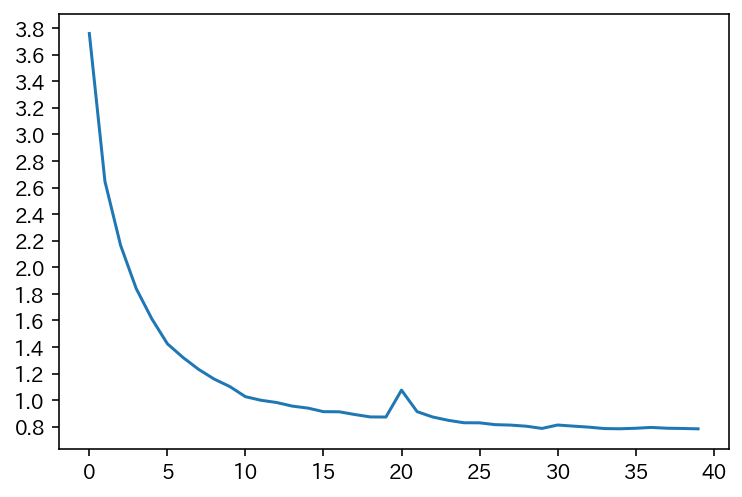

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.ticker as ticker
import numpy as np

def showPlot(points:list)->None:
    plt.figure()
    fig, ax = plt.subplots()
    loc = ticker.MultipleLocator(base=0.2) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)
    
showPlot(losses)    

In [20]:
_ = evaluateRandomly(encoder, decoder, n=5)

入力: [480, 745, 163, 0]<-[20, 5, 16, 9, 5, 0]:['y', 'o', 'q', 't', 'o', '<EOW>']
出力: [119, 15, 0] :['新', 'っ', '<EOW>']
---
入力: [1839, 0]<-[18, 7, 10, 8, 0]:['k', 'a', 'g', 'i', '<EOW>']
出力: [209, 871, 0] :['カ', 'ギ', '<EOW>']
---
入力: [971, 256, 405, 428, 0]<-[5, 11, 14, 22, 34, 8, 0]:['o', 'r', 'e', 'N', 'j', 'i', '<EOW>']
出力: [130, 822, 0] :['連', '健', '<EOW>']
---
入力: [38, 581, 0]<-[6, 14, 23, 8, 0]:['h', 'e', 'b', 'i', '<EOW>']
出力: [839, 0] :['編', '<EOW>']
---
入力: [74, 241, 0]<-[4, 7, 18, 7, 20, 12, 23, 8, 0]:['n', 'a', 'k', 'a', 'y', 'u', 'b', 'i', '<EOW>']
出力: [74, 859, 0] :['中', '西', '<EOW>']
---


# 8 自由入力による評価

In [27]:
def tokenize(inp_word:str, pad:bool=False)->list:
    if pad:
        ret = [tlpa.phone_vocab.index('<PAD>') for _ in range(tlpa.max_phone_length - len(inp_word))]
    else:
        ret = []
    return ret + [tlpa.phone_vocab.index(ch) if ch in tlpa.phone_vocab else tlpa.phone_vocab[tlpa.phone_vocab.index('<UNK>')] for ch in inp_word]


#print(train_dataset.convert_phone_ids_to_tokens(tokenize('keroro',pad=True)))

['<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', 'k', 'e', 'r', 'o', 'r', 'o']


In [28]:
def evaluate_free_input(encoder:nn.Module, 
                        decoder:nn.Module,
                        inp=None,
                       )->None:
    if inp == None:
        inp = input()
    inp = jaconv.normalize(inp)
    inputs = tokenize(inp, pad=False)
    input_ids = inputs
    output_tokens, output_words, attentions = evaluate(encoder, decoder, input_ids)
    #output_ids = val_dataset.convert_phone_ids_to_tokens(output_tokens)
    output_ids = output_tokens
    return input_ids, output_ids


In [30]:
inp, out = evaluate_free_input(encoder,decoder)
print(val_dataset.convert_phone_ids_to_tokens(inp))
print(out)

 keroro


['k', 'e', 'r', 'o', 'r', 'o']
['け', 'え', 'え', '<EOW>']


# 9 エンコーダの内部表現の取得

In [31]:
def get_an_encoder_representation(encoder:nn.Module,
                                  input_ids:list,
                                  max_length:int=tlpa.max_phone_length+1)->(list,torch.LongTensor):
    with torch.no_grad():
        input_tensor = convert_ids2tensor(input_ids)
        input_length = input_tensor.size()[0]
        encoder_hidden = encoder.initHidden()
        encoder_outputs = torch.zeros(max_length, encoder.n_hid, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei],
                                                     encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        return encoder_hidden


In [32]:
X = np.zeros((val_dataset.__len__(),hidden_size))
for i in range(val_dataset.__len__()):
    x = get_an_encoder_representation(encoder, input_ids = val_dataset.__getitem__(1)[0])
    X[i] = x.squeeze(0).clone().detach().numpy()[0]

print(X.shape)

(237, 256)


In [33]:
import ccap.tsne as tsne

tsne_result = tsne.tsne(X)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  237 ...
Mean value of sigma:  2.9802322387695312e-08
Iteration  250 : error is  2.755681036318062e-09
Iteration  500 : error is  -6.653764564226295e-11
Iteration  750 : error is  -8.036013853661205e-11
Iteration  1000 : error is  -8.169946427233602e-11


# 10 内部表現の描画

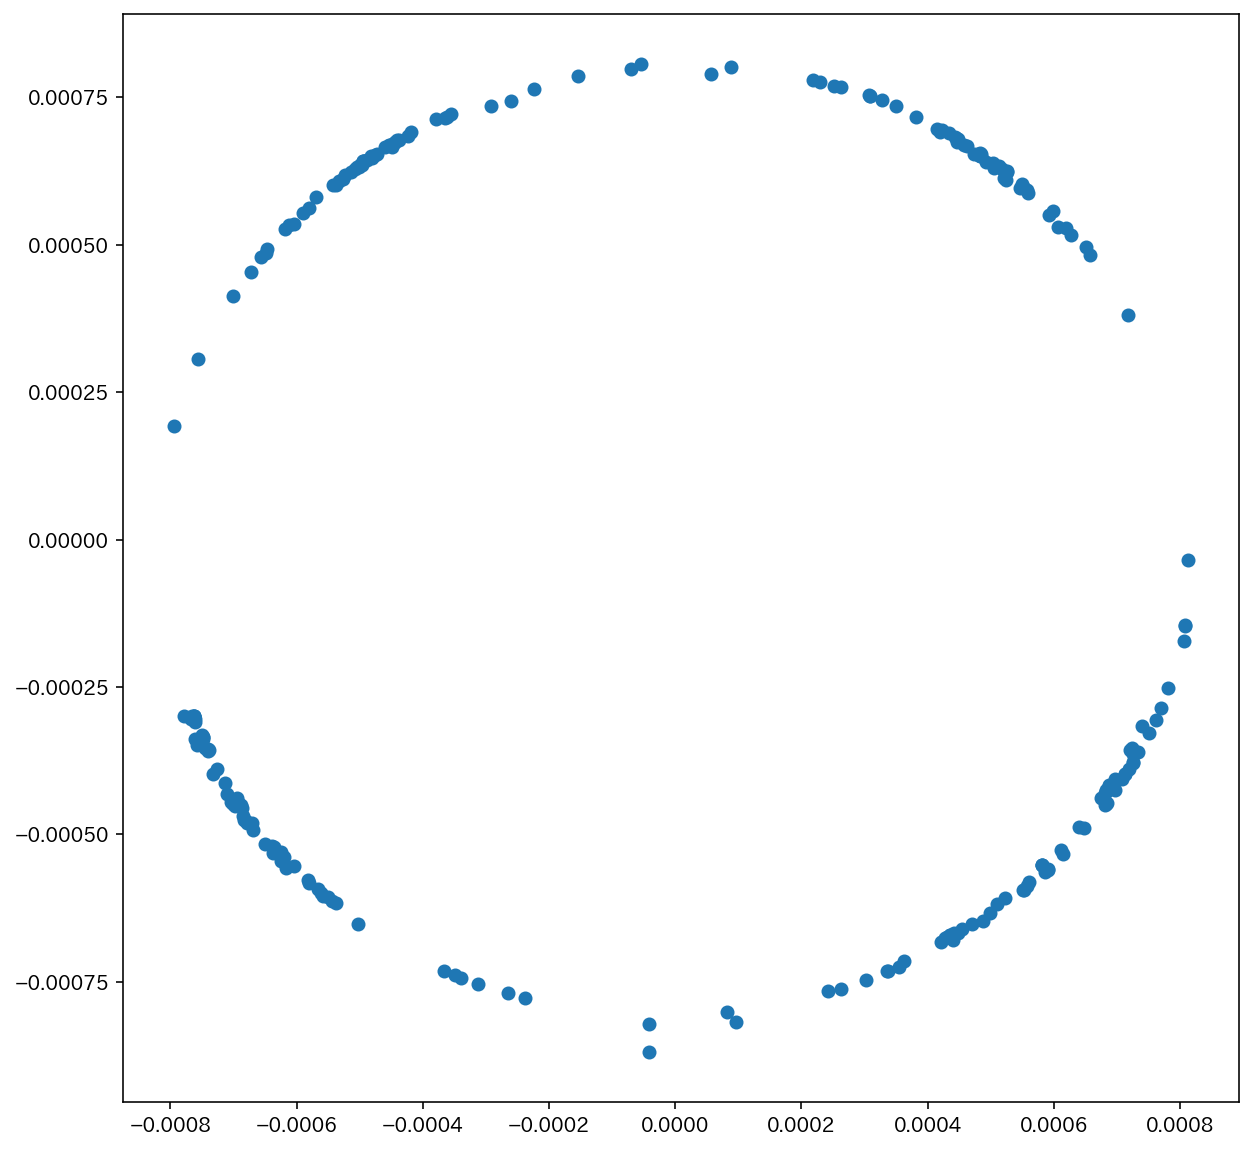

In [34]:
tsne_result.shape
plt.figure(figsize=(10,10))
plt.scatter(tsne_result[:,0],tsne_result[:,1])
plt.show()

In [35]:
x_min = tsne_result[:,0].argmin()
x_max = tsne_result[:,0].argmax()
y_min = tsne_result[:,1].argmin()
y_max = tsne_result[:,1].argmax()

print(f'X 座標最小値:{tlpa.vocab[x_min]}')
print(f'X 座標最大値:{tlpa.vocab[x_max]}')
print(f'Y 座標最小値:{tlpa.vocab[y_min]}')
print(f'Y 座標最大値:{tlpa.vocab[y_max]}')


X 座標最小値:のど仏
X 座標最大値:消しゴム
Y 座標最小値:大根
Y 座標最大値:ステーキ


In [38]:
tlpa.vocab[x_min]

'のど仏'

In [48]:
#path_saved = params['path_saved'] # '2022_0212tlpa_p2o.pt'
path_saved = '2022checkpoints/2022_0214tlpa_p2o.pt'
torch.save({'encoder':encoder.state_dict(),
            'decoder':decoder.state_dict()}, path_saved)
checkpoint = torch.load(path_saved)
encoder2 = EncoderRNN(len(tlpa.phone_vocab), hidden_size).to(device)
decoder2 = AttnDecoderRNN(n_hid=hidden_size, n_out=len(tlpa.ortho_vocab), dropout_p=params['dropout_p']).to(device)
encoder2.load_state_dict(checkpoint['encoder'])
decoder2.load_state_dict(checkpoint['decoder'])
    

<All keys matched successfully>

In [49]:
!gls -lt *.pt 2022checkpoints

-rw-r--r-- 1 asakawa staff 5776053 Feb 13 00:08 2022_0212tlpa_o2p.pt

2022checkpoints:
total 7940
-rw-r--r-- 1 asakawa staff 7667573 Feb 14 17:32 2022_0214tlpa_p2o.pt
